
## Mini PJT

- `California Housing` 데이터셋을 이용하여 선형회귀 문제를 풀어봅니다.

(Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)


- 단순 선형회귀를 통해 각 Feature들을 이용하여 집값을 예측해봅니다.


- 20640개의 row, 8개의 column으로 구성되어 있습니다.


- 각 feature별 영향력을 알아보고, 테스트 해봅니다.

### 1. 데이터 및 라이브러리 불러오기

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# California 데이터 불러오기
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame = True)['data']
y = fetch_california_housing(as_frame = True)['target']
data = pd.concat([X,y], axis=1)

display(X)
display(y)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Data Preprocessing

1. 결측치 확인

2. feature selection

In [11]:
# 결측치를 확인합니다.
data.info() # dtype이 object인 경우 ' ', '-'처럼 결측치는 아니지만 이상한 값이 있을 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# 필요없는 column을 제거합니다.
# 모든 column을 사용합니다!

### 3. EDA

- feature distribution

- target distribution



In [12]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
temp = data.columns.tolist().remove('Population')
temp

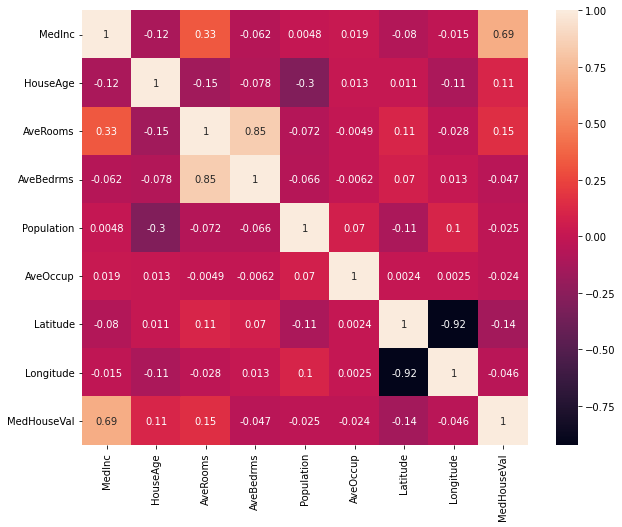

In [36]:
# feature distribution

# plt.figure(figsize=(10,8))
# sns.boxplot(data=data.loc[:,['MedInc','HouseAge','AveRooms','AveBedrms','AveOccup','Latitude','Longitude','MedHouseVal' ]])
# sns.boxplot(data=data.loc[:,['AveOccup']])
# sns.histplot(data=data, x='Latitude')
# plt.ylim(0,40)
# plt.show()

# data.AveOccup.value_counts()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [17]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
# data.loc[data.AveRooms > 100, :] # 1914, 1979 row 제거
# data.loc[data.AveOccup > 200 , :] # 3364, 13034, 16669, 19006 row 제거
# AveBedrms, Longitude columns 제거 (다중공선성)
data = data.drop(index=[1914, 1979, 3364, 13034, 16669, 19006]) # remove outlier
data = data.drop(columns=['AveBedrms', 'Longitude']) # remove collinearity
data
# linear regression 에서는 성능의 차이가 큼!

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


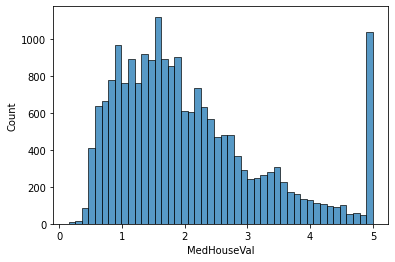

In [34]:
# target distribution
sns.histplot(data=data, x='MedHouseVal') 
# 분류에서는 5 이상을 분류하면 되는데 회귀분석에서는 이상치에 영향을 많이 받으므로 어떻게 해야할지 고려해봐야한다. 

### 4. Training

- train-test split

- Standardization

- Model training

- Hyper-parameter tuning

- Evaluation

In [47]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

# 트테트테
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 랜덤된 split 데이터를 고정하여 사용하기 위해

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# 6 : 2 : 2 = train : validation : test
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


In [49]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17244,2.3681,39.0,3.922460,1.018717,1404.0,3.754011,34.43,-119.67
8817,10.1357,24.0,7.564516,0.985112,2248.0,2.789082,33.74,-118.32
19686,1.6719,41.0,3.908012,0.916914,856.0,2.540059,39.13,-121.62
3545,4.8333,9.0,5.201093,1.009836,1884.0,2.059016,34.24,-118.63
17019,5.5902,38.0,7.010127,0.979747,994.0,2.516456,37.52,-122.30


제대로 하려면 data를 train, val, test data로 나눈 후에
train data에 대해서만 EDA를 진행해야함!

In [50]:
# feature scaling
from sklearn.preprocessing import StandardScaler # 표준정규분포로 바꿈

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # dtype이 전부 float value, 모든 column scaler 적용
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[-0.79547754,  0.8260251 , -0.71694298, ...,  0.10188491,
        -0.56877746, -0.04497204],
       [ 3.31836617, -0.36373696,  1.03623684, ..., -0.03451767,
        -0.89258573,  0.628346  ],
       [-1.16419606,  0.98466004, -0.72389784, ..., -0.06971956,
         1.63687302, -1.01754255],
       ...,
       [ 0.06054048, -0.83964178,  0.06642747, ...,  0.02958115,
        -1.36187306,  1.29168896],
       [ 0.33954209, -0.99827672, -0.48019235, ..., -0.1339459 ,
        -0.84565699,  0.85278535],
       [ 0.17472565,  0.50875522, -0.50050269, ..., -0.00798968,
        -0.81280688,  0.628346  ]])

In [52]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (sklearn에 호환) - 분류, 회귀 사용 가능
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM (sklearn에 호환) - 분류, 회귀 사용 가능

from sklearn.metrics import mean_squared_error

In [55]:
## training
# def train(model, X_train, y_train) :
#     model.fit()...
#     model.predict...

reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

# validation, test prediction
pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)


mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print('1. Linear Regression\t, train = % .4f, val = % .4f' % (mse_train, mse_val))
print('2. Lasso\t\t, train = % .4f, val = % .4f' % (mse_train2, mse_val2))
print('3. Ridge\t\t, train = % .4f, val = % .4f' % (mse_train3, mse_val3))
print('4. XGBoost\t\t, train = % .4f, val = % .4f' % (mse_train4, mse_val4))
print('5. LightGBM\t\t, train = % .4f, val = % .4f' % (mse_train5, mse_val5))

# LightGBM의 성능이 가장 좋은 것을 확인
# Lasso의 성능이 가장 안 좋은 것을 확인

[09:05:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. Linear Regression	, train =  0.5144, val =  0.5297
2. Lasso		, train =  1.3246, val =  1.3734
3. Ridge		, train =  0.5144, val =  0.5297
4. XGBoost		, train =  0.2596, val =  0.2885
5. LightGBM		, train =  0.1450, val =  0.2264


사용자가 직접 설정하면 하이퍼 파라미터<br>
모델 혹은 데이터에 의해 결정되면 파라미터
<br><br>
하이퍼 파라미터는 모델링할 때 사용자가 직접 세팅해주는 값을 뜻합니다. (They are often specified by the practitioner)<br> learning rate나 서포트 벡터 머신에서의 C, sigma 값, KNN에서의 K값 등등 굉장히 많습니다.

In [62]:
# Hyper-parameter tuning
# 1. Human Search : 사람이 직접 tuning
# 2. Grid Search (GridSearchCV) : 주어진 hyper-parameter의 조합을 모두 돌려보는 방식
# 3. Bayesian Optimization(hyperopt, optuna, ...) : hyper-parameter를 최적화하는 베이지안 방식을 사용.

# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3,5,-1], # 3
    'learning_rate' : [0.1, 0.01], # 2
    'n_estimators' : [50, 100] # 2
}
# 3 X 3 X 2 = 12, 12개 조합 모두를 돌려보는 방식 -> GridSearchCV

gcv = GridSearchCV(reg5, param_grid = param_grid, scoring = 'neg_mean_squared_error', verbose = 1) # verbose 학습 중인 parameter를 보는 argument
gcv.fit(X_train, y_train)
# print(gcv.cv_results_)
print(gcv.best_estimator_)
print(gcv.best_params_) # default 값이 가장 좋았다! 라는 결론 나옴

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LGBMRegressor()
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100}


Grid Search (GridSearchCV) 사용 시 주의해야 할 것 
1. hyper parameter의 조합이 엄청 늘어나게 되면 메모리나 시간이 많이 필요함
2. hyper parameter 조합이 개수 곱하기로 늘어나기 때문에 하나씩만 추가해도 조합 수가 크게 증가함 

### 5. Test(Prediction)

In [63]:
# training set과 같은 전처리! 위에서 완료!
final_model = gcv.best_estimator_

In [56]:
# prediction!

result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [58]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

# test data에서도 LightGBM이 성능이 가장 좋은 것을 확인!

---------- Linear Regression ---------
MSE in training: 0.5618
---------- Lasso ---------
MSE in training: 1.3106
---------- Ridge ---------
MSE in training: 0.5617
---------- XGBoost ---------
MSE in training: 0.2967
---------- LightGBM ---------
MSE in training: 0.2164


복습 : 오늘 배운 내용을 가지고 앞서 프로젝트 했던 타이타닉에 score를 올려보는 방향으로 다시 해보자!